# Heart Failure Predcition

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

"""
[Attribute Information]

Age           : age of the patient [years]
Sex           : sex of the patient [M: Male, F: Female]
ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP     : resting blood pressure [mm Hg]
Cholesterol   : serum cholesterol [mm/dl]
FastingBS     : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG    : resting electrocardiogram results [Normal: Normal, 
                                                  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
                                                  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR         : maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak       : oldpeak = ST [Numeric value measured in depression]
ST_Slope      : the slope of the peak exercise ST segment [Up : upsloping, 
                                                          Flat: flat, 
                                                          Down: downsloping]
HeartDisease  : output class [1: heart disease,
                              0: Normal]

"""

"\n[Attribute Information]\n\nAge           : age of the patient [years]\nSex           : sex of the patient [M: Male, F: Female]\nChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\nRestingBP     : resting blood pressure [mm Hg]\nCholesterol   : serum cholesterol [mm/dl]\nFastingBS     : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\nRestingECG    : resting electrocardiogram results [Normal: Normal, \n                                                  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), \n                                                  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\nMaxHR         : maximum heart rate achieved [Numeric value between 60 and 202]\nExerciseAngina: exercise-induced angina [Y: Yes, N: No]\nOldpeak       : oldpeak = ST [Numeric value measured in depression]\nST_Slope      : t

## EDA for Numerical Features

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Apparently there are no NaN, so we proceed to analayse the distribution of the features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bdab4dc50>,
      dtype=object)

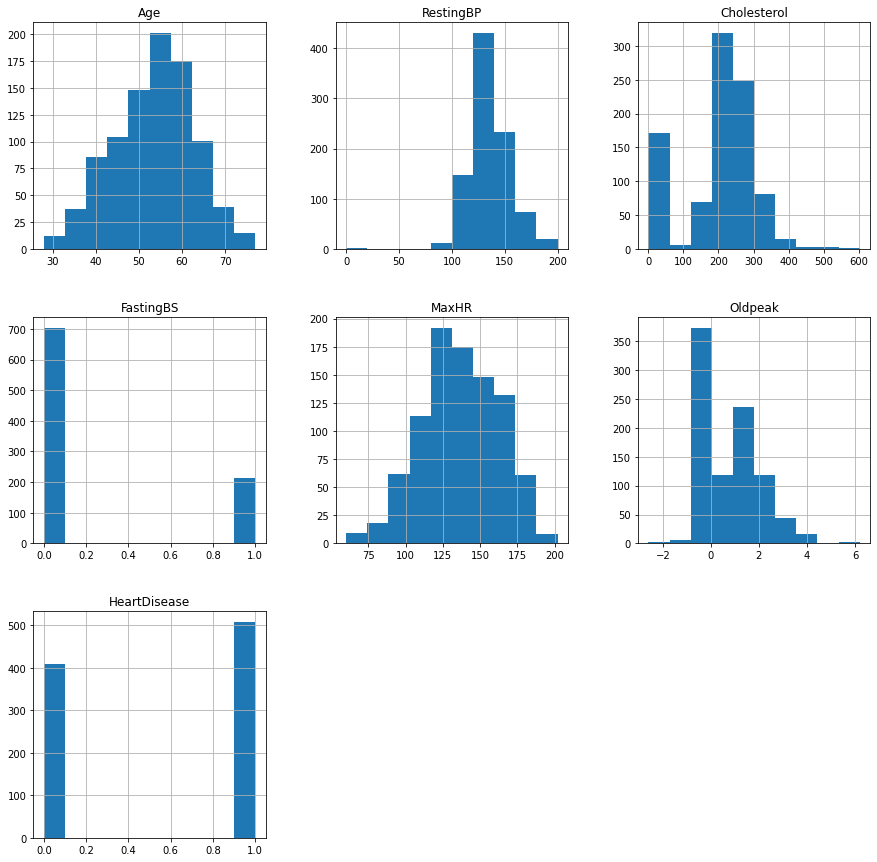

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

Next, I tried to observe the correlation among these numerical features

In [7]:
# Correlation Matrix
cor = df.corr()
cor

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


I could not deduce any conclusion from the correlation matrix. Thus, I proceed to plot general box plot to see if theres any outliers

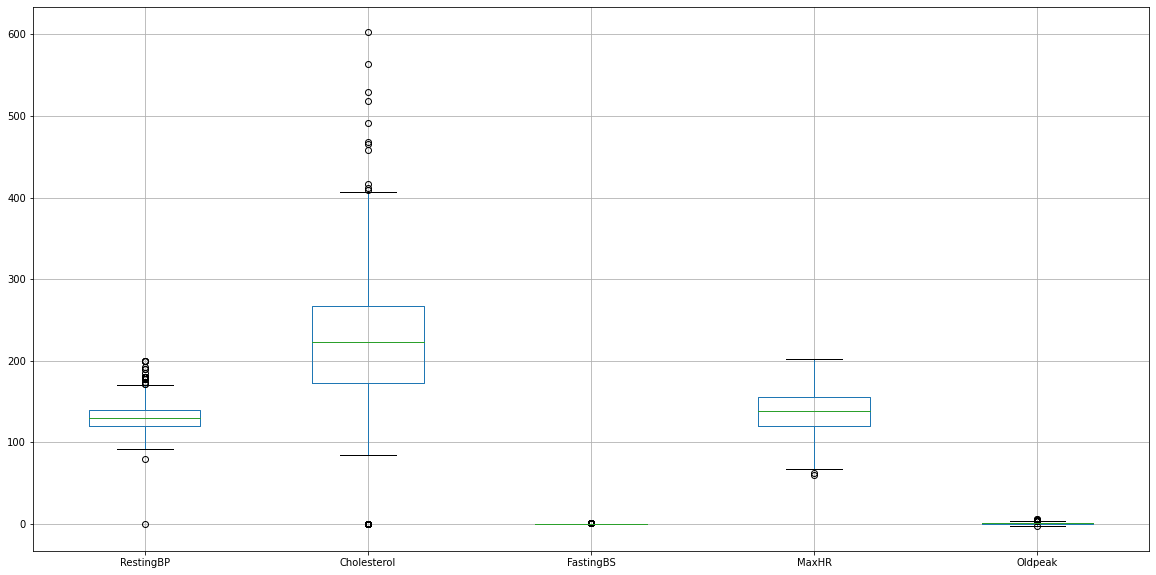

In [24]:
fig = plt.figure(figsize = (20,10))               # Assign Figure Size
ax = fig.gca()                                    # The gca() method figure module of matplotlib library is used to get the current axes.
df.iloc[:,1:-2].boxplot(ax = ax)                  # Time column is removed and only input features is included

Another analysis that I think is quite crucial to execute is skewness analysis

* If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. 
* If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. 
* If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed
'''


In [25]:
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

The Skewness values for the features seems not too significant. For the FastingBS, I believe it has binary class of 0,1. Thus the skewness value for that features is neglected. So now we will focus on finding outliers

In [27]:
Q1  = df.quantile(0.25)  # First Quartile
Q3  = df.quantile(0.75)  # Third Quartile
IQR = Q3 - Q1



upper_outlier = df > Q3 + (1.5 * IQR)
lower_outlier = df < Q1 - (1.5 * IQR)

overall_outliers = upper_outlier | lower_outlier

print("[TOTAL OUTLIERS]\n")
print(df[overall_outliers].count())

[TOTAL OUTLIERS]

Age                 0
Sex                 0
ChestPainType       0
RestingBP          28
Cholesterol       183
FastingBS         214
RestingECG          0
MaxHR               2
ExerciseAngina      0
Oldpeak            16
ST_Slope            0
HeartDisease        0
dtype: int64


In [43]:
"""
[BOX PLOT FOR NUMERIC FEATURES]
"""


# Age Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "Age",
             x      =  "HeartDisease",
             title  =  "Age Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# RestingBP Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "RestingBP",
             x      =  "HeartDisease",
             title  =  "RestingBP Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# Cholesterol Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "Cholesterol",
             x      =  "HeartDisease",
             title  =  "Cholesterol Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# MaxHR Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "MaxHR",
             x      =  "HeartDisease",
             title  =  "MaxHR Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# Oldpeak Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "Oldpeak",
             x      =  "HeartDisease",
             title  =  "Oldpeak Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()  

From these boxplot and common intuition, I will deduce that the significant outliers are in RestingBP and Cholesterol, where such features is assumed impossible to have value of 0

## EDA for Categorical Features

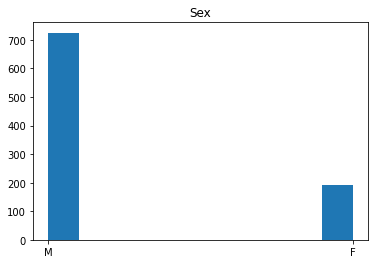

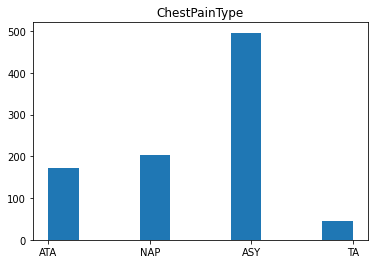

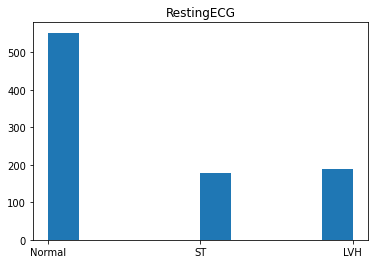

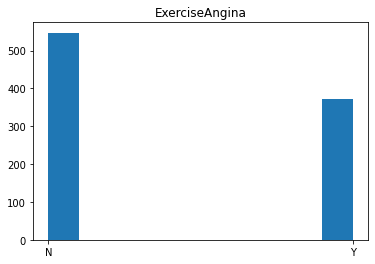

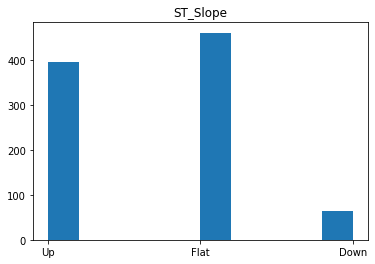

In [8]:
categorical_feat = df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]

for i in categorical_feat.columns:
    plt.hist(categorical_feat[i])
    plt.title(i)
    plt.show()

In [17]:
# Gender relationship with Heart Disease

import plotly.express as px
fig = px.histogram(df,
                   x          = "HeartDisease",
                   color      = "Sex",
                   hover_data = df.columns,
                   title      = "Gender relationship with Heart Disease",
                   barmode    = "group",
                   width      = 600,
                   height     = 400)
fig.show()

print("\n")
print("Total Female in Data: ", df[df["Sex"]=="F"]["HeartDisease"].count())
print("Total Male in Data  : ", df[df["Sex"]=="M"]["HeartDisease"].count())
print("\n")

pd.pivot_table(df,
               index   = 'HeartDisease', 
               columns = 'Sex', 
               values  = 'ChestPainType',
               aggfunc ='count')



Total Female in Data:  193
Total Male in Data  :  725




Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [18]:
# How Chest Pain correlated to Heart Disease
fig=px.histogram(df,
                 x          = "ChestPainType",
                 color      = "Sex",
                 hover_data = df.columns,
                 title      = "Types of Chest Pain",
                 width      = 600,
                 height     = 400
                )
fig.show()



pd.pivot_table(df,
               index   = 'HeartDisease', 
               columns = 'ChestPainType', 
               values  = 'Sex',
               aggfunc = 'count')

ChestPainType,ASY,ATA,NAP,TA
HeartDisease,,,,
0,104,149,131,26
1,392,24,72,20


In [22]:
# How Resting ECG correlated to Heart Disease
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG",
                 width      = 600,
                 height     = 400)
fig.show()

pd.pivot_table(df,
               index   = 'HeartDisease', 
               columns = 'RestingECG', 
               values  = 'Sex',
               aggfunc = 'count')

RestingECG,LVH,Normal,ST
HeartDisease,,,
0,82,267,61
1,106,285,117


## Data Preprocessing 1: Removing Outliers

In [45]:
# Remove rows where Cholesterol and RestingBP equals 0

df.drop(df.index[df['Cholesterol'] == 0], inplace=True)
df.drop(df.index[df['RestingBP'] == 0], inplace=True)

In [46]:
# Review boxplot again

"""
[BOX PLOT FOR NUMERIC FEATURES]
"""


# Age Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "Age",
             x      =  "HeartDisease",
             title  =  "Age Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# RestingBP Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "RestingBP",
             x      =  "HeartDisease",
             title  =  "RestingBP Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# Cholesterol Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "Cholesterol",
             x      =  "HeartDisease",
             title  =  "Cholesterol Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# MaxHR Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "MaxHR",
             x      =  "HeartDisease",
             title  =  "MaxHR Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()


# Oldpeak Distribution relation with Heart Disease
fig = px.box(df,
             y      =  "Oldpeak",
             x      =  "HeartDisease",
             title  =  "Oldpeak Distribution relation with Heart Disease",
             color  =  "Sex",
             width  =  800,
             height =  400)
fig.show()  

## Data Preprocessing 2: Handling Categorical Variables

In [47]:
from sklearn.preprocessing import LabelEncoder

df_enc = df.apply(LabelEncoder().fit_transform)

In [48]:
df_enc.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,38,146,0,1,88,0,1,2,0
1,21,0,2,52,39,0,1,72,0,11,1,1
2,9,1,1,28,140,0,2,17,0,1,2,0
3,20,0,0,36,71,0,1,24,1,16,1,1
4,26,1,2,46,52,0,1,38,0,1,2,0


## Data Preprocessing 3: Split into Train and Test

In [51]:
from sklearn.model_selection import train_test_split

# For development (Train/Test)
X = df_enc.iloc[:, :-1].values
y = df_enc.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = None
                                                    )

## Data Preprocessing 4: Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
X_train_sc   = scaler.fit_transform(X_train)                # Fit and transform the training set 
X_test_sc    = scaler.transform(X_test)                     # DO NOT CHEAT! Only transform the test set

## Train a Model (MLP Neural Network)

In [115]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(
                    hidden_layer_sizes  = (1000),
                    alpha               = 0.05,      # Regularization term
                    max_iter            = 500,       # Maximum number of iterations
                    tol                 = 1e-3,      # Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations
                    batch_size          = 24,        # Size of minibatches for stochastic optimizers
                    validation_fraction = 0.3,
                    verbose             = True).fit(X_train_sc, y_train)

Iteration 1, loss = 0.49616259
Iteration 2, loss = 0.37787195
Iteration 3, loss = 0.35321833
Iteration 4, loss = 0.33867310
Iteration 5, loss = 0.32985133
Iteration 6, loss = 0.31898747
Iteration 7, loss = 0.31148595
Iteration 8, loss = 0.30477481
Iteration 9, loss = 0.29882733
Iteration 10, loss = 0.29305503
Iteration 11, loss = 0.28873296
Iteration 12, loss = 0.28463126
Iteration 13, loss = 0.28158387
Iteration 14, loss = 0.28057814
Iteration 15, loss = 0.27936866
Iteration 16, loss = 0.27367345
Iteration 17, loss = 0.27097817
Iteration 18, loss = 0.27503255
Iteration 19, loss = 0.26924768
Iteration 20, loss = 0.26358400
Iteration 21, loss = 0.26103149
Iteration 22, loss = 0.26253518
Iteration 23, loss = 0.26186000
Iteration 24, loss = 0.25680437
Iteration 25, loss = 0.25764281
Iteration 26, loss = 0.25783375
Iteration 27, loss = 0.25308986
Iteration 28, loss = 0.25432511
Iteration 29, loss = 0.25256101
Iteration 30, loss = 0.25230292
Iteration 31, loss = 0.24880884
Iteration 32, los

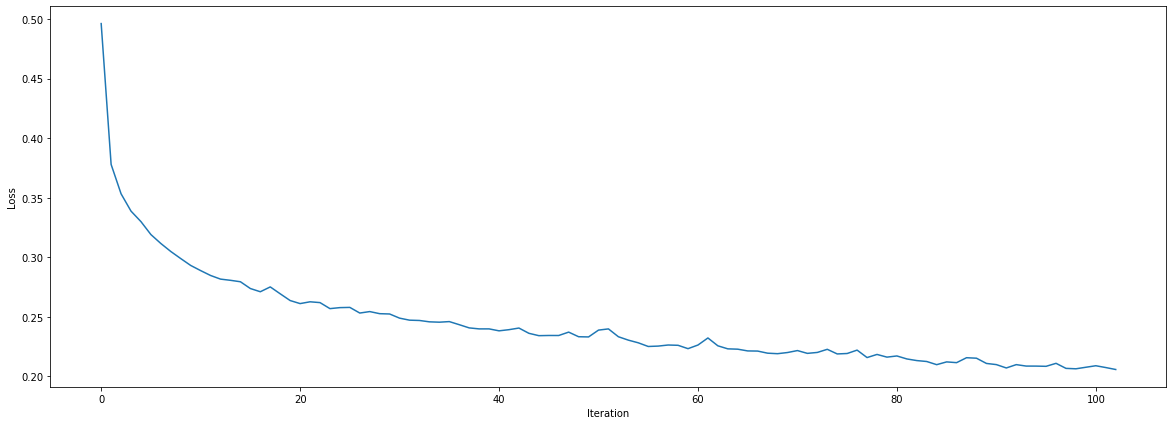

In [116]:
plt.figure(figsize=(20,7))
plt.plot(mlp_clf.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

## Test and Evaluate

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



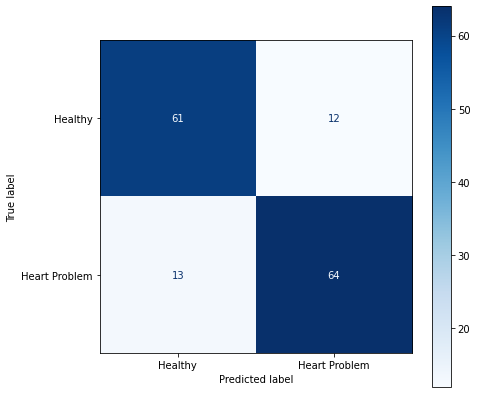

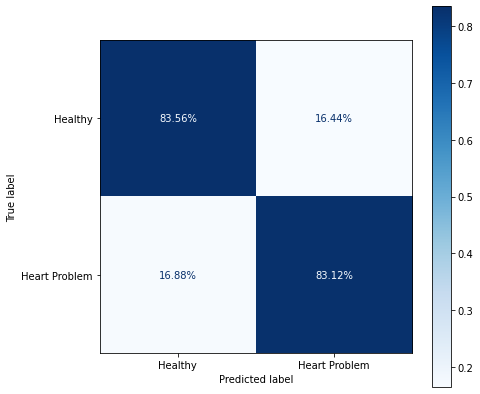

Test Accuracy :  83.33333333333334 %
Test Precision:  84.21052631578947 %
Test Recall   :  83.11688311688312 %


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Test the Model 
y_pred_test_mlp   = mlp_clf.predict(X_test_sc)

# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(7, 7))                              # Figure Size (Width, Height)

plot_confusion_matrix(mlp_clf,                                      # Model Name
                      X_test_sc,                                    # Input of the Test Set 
                      y_test,                                       # Output of the Test Set
                      cmap=plt.cm.Blues,                            # Color Scheme
                      display_labels=["Healthy","Heart Problem"],   # Label
                      ax=ax,                                        # Applies the ax configuration we defined previously
                      values_format = '.0f')                        # Zero significant figures

# Normalized Confusion Matrix
fig, ax = plt.subplots(figsize=(7, 7))                              # Figure Size (Width, Height)
plot_confusion_matrix(mlp_clf,                                      # Model Name
                      X_test_sc,                                    # Input of the Test Set
                      y_test,                                       # Output of the Test Set
                      display_labels=["Healthy","Heart Problem"],   # Label
                      cmap=plt.cm.Blues,                            # Color Scheme
                      ax=ax,                                        # Applies the ax configuration we defined previously
                      values_format = '.2%',                        # Two significant figures; in percentage
                      normalize = 'true')                           # Normalize the value
  
plt.show()                                                          # Show the plot                      


# Performance Metrics
print("Test Accuracy : ",accuracy_score(y_test, y_pred_test_mlp)*100,"%")
print("Test Precision: ",precision_score(y_test, y_pred_test_mlp)*100,"%")
print("Test Recall   : ",recall_score(y_test, y_pred_test_mlp)*100,"%")